# Visualization

## 1. Imports and config

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.config import DATA_FILES, FIGURES_DIR

%load_ext autoreload
%autoreload 2

sns.set_theme(style="whitegrid")

train_df = pd.read_csv(DATA_FILES["train_processed"])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. Load preprocessed data


Creating Visualizations
------------------------------
Visualization saved to /home/martinzoha/projects/fake-news-detection-ml/reports/figures/enhanced_data_analysis.png


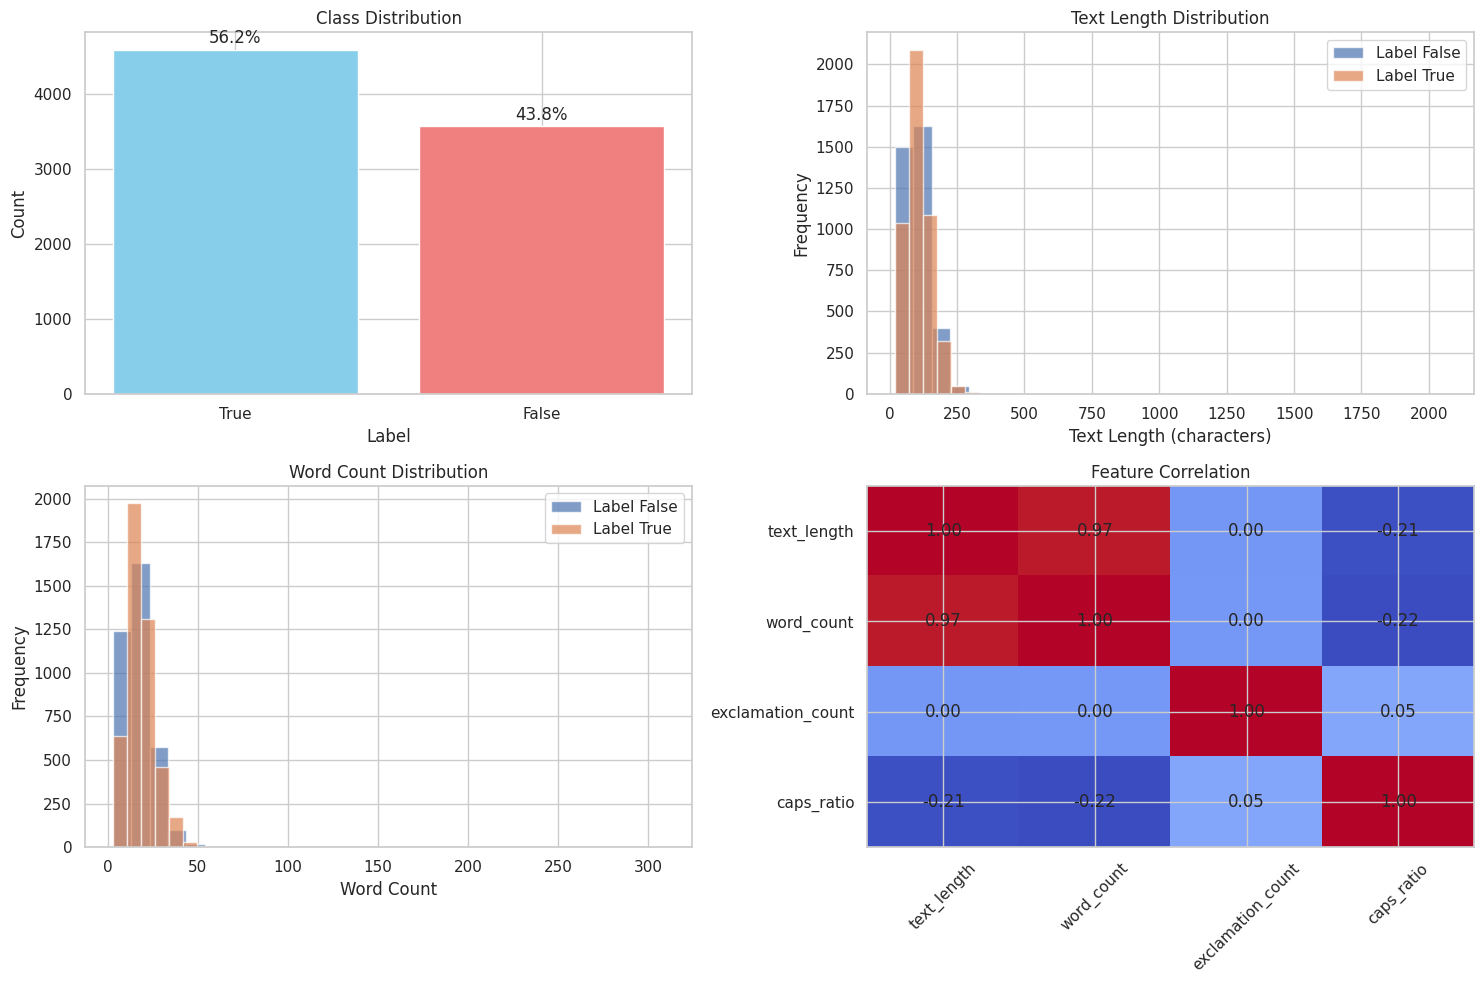

In [4]:
print("\nCreating Visualizations")
print("-" * 30)

# Create figure directory
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Class distribution
if 'Label' in train_df.columns:
    class_counts = train_df['Label'].value_counts()
    axes[0, 0].bar(class_counts.index.astype(str), class_counts.values, color=['skyblue', 'lightcoral'])
    axes[0, 0].set_title('Class Distribution')
    axes[0, 0].set_xlabel('Label')
    axes[0, 0].set_ylabel('Count')
    
    # Add percentage labels
    total = class_counts.sum()
    for i, (label, count) in enumerate(class_counts.items()):
        axes[0, 0].text(i, count + total*0.01, f'{count/total*100:.1f}%', ha='center')

# Plot 2: Text length distribution
for label in train_df['Label'].unique() if 'Label' in train_df.columns else [0]:
    if 'Label' in train_df.columns:
        subset = train_df[train_df['Label'] == label]['text_length']
        axes[0, 1].hist(subset, alpha=0.7, label=f'Label {label}', bins=30)
    else:
        axes[0, 1].hist(train_df['text_length'], alpha=0.7, bins=30)

axes[0, 1].set_title('Text Length Distribution')
axes[0, 1].set_xlabel('Text Length (characters)')
axes[0, 1].set_ylabel('Frequency')
if 'Label' in train_df.columns:
    axes[0, 1].legend()

# Plot 3: Word count distribution  
for label in train_df['Label'].unique() if 'Label' in train_df.columns else [0]:
    if 'Label' in train_df.columns:
        subset = train_df[train_df['Label'] == label]['word_count']
        axes[1, 0].hist(subset, alpha=0.7, label=f'Label {label}', bins=30)
    else:
        axes[1, 0].hist(train_df['word_count'], alpha=0.7, bins=30)

axes[1, 0].set_title('Word Count Distribution')
axes[1, 0].set_xlabel('Word Count')
axes[1, 0].set_ylabel('Frequency')
if 'Label' in train_df.columns:
    axes[1, 0].legend()

# Plot 4: Feature correlation
feature_subset = ['text_length', 'word_count', 'exclamation_count', 'caps_ratio']
corr_data = train_df[feature_subset].corr()
im = axes[1, 1].imshow(corr_data, cmap='coolwarm', aspect='auto')
axes[1, 1].set_xticks(range(len(feature_subset)))
axes[1, 1].set_yticks(range(len(feature_subset)))
axes[1, 1].set_xticklabels(feature_subset, rotation=45)
axes[1, 1].set_yticklabels(feature_subset)
axes[1, 1].set_title('Feature Correlation')

# Add correlation values
for i in range(len(feature_subset)):
    for j in range(len(feature_subset)):
        axes[1, 1].text(j, i, f'{corr_data.iloc[i, j]:.2f}', 
                       ha='center', va='center')

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'enhanced_data_analysis.png', dpi=300, bbox_inches='tight')
print(f"Visualization saved to {FIGURES_DIR / 'enhanced_data_analysis.png'}")